In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import gc
import sklearn
import collections
import json
from tqdm import tqdm
from wordcloud import WordCloud
from glob import glob


pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 500

### 1- Employee courses file

In [2]:
employee_courses = pd.read_csv("Hackathon Datasets/Learning & Development/employees_courses.csv")

In [3]:
employee_courses.shape

(2348, 7)

In [4]:
employee_courses.head()

EMPLOYEE_ID                 CURRENT_DEPARTMENT  \
0  Employee_1      Commercial Support Department   
1  Employee_2                                NaN   
2  Employee_3                                NaN   
3  Employee_4                  Consumer Business   
4  Employee_5  Technology and Digital Innovation   

                    CURRENT_JOB_TITLE            PREVIOUS_DEPARTMENT  \
0  Support & Quality Unit Team Member  Commercial Support Department   
1                                 NaN            Enterprise Business   
2                                 NaN                    Engineering   
3  VIP Account's (Darak) Professional              Consumer Business   
4          Enterprise Applications PT                            NaN   

                           PREVIOUS_JOB_TITLE  \
0  Delivery & Back Office Support Team Member   
1                    Network Administrator TM   
2                                NOC Operator   
3            VIP Account's Manager (Darak) TM   
4            CRM Analyst and Developer Intern   

                                                 COURSE  \
0  Teamwork Skills: Communicating Effectively in Groups   
1                                      Business Writing   
2                             Negotiation  Fundamentals   
3  Teamwork Skills: Communicating Effectively in Groups   
4        Databases and SQL for Data Science with Python   

                       DATE  
0  2023-05-12T12:05:41.000Z  
1  2021-11-09T23:46:50.000Z  
2  2021-11-03T22:14:46.000Z  
3  2023-08-16T08:33:00.000Z  
4  2023-03-30T09:26:06.000Z

In [5]:
# calculating how many null records exist
employee_courses.isnull().sum() / len(employee_courses)

EMPLOYEE_ID            0.000000
CURRENT_DEPARTMENT     0.074106
CURRENT_JOB_TITLE      0.109881
PREVIOUS_DEPARTMENT    0.262351
PREVIOUS_JOB_TITLE     0.011499
COURSE                 0.000000
DATE                   0.000000
dtype: float64

In [6]:
employee_courses.DATE.min()

'2021-08-03T07:15:03.000Z'

In [7]:
employee_courses.DATE.max()

'2024-02-18T06:45:31.000Z'

In [8]:
# calculating number of unique employees
employee_courses.EMPLOYEE_ID.nunique()

908

In [9]:
employee_courses.CURRENT_DEPARTMENT.nunique()

14

In [10]:
employee_courses.CURRENT_DEPARTMENT.value_counts(normalize=True)

Engineering                                    0.257130
Commercial Support Department                  0.197332
Consumer Business                              0.155474
Enterprise Business                            0.112236
Technology and Digital Innovation              0.085097
Human Resources and Administration             0.056118
Finance                                        0.048758
Corporate Communications and Sustainability    0.030359
Governance, Risk, and Compliance               0.022999
Data Analytics & AI                            0.022079
Legal & Regulatory Affairs                     0.008280
Zain Cash Engineering                          0.002300
Media Relations                                0.001380
Strategy & PMO                                 0.000460
Name: CURRENT_DEPARTMENT, dtype: float64

In [11]:
employee_courses.CURRENT_JOB_TITLE.nunique()

587

In [12]:
employee_courses.CURRENT_JOB_TITLE.value_counts(normalize=True)[:100]

Enterprise & Home Internet Complaints Engineer Team Member           0.018182
CER Team Member                                                      0.016268
RAN Optimization Engineer Team Member                                0.015789
Key Account's Senior Team Member                                     0.012919
System Administrator Senior Professional                             0.010526
Mobile Solutions & Zain Wallets Complaints Team Member               0.010526
RAN Optimization Engineer PT                                         0.009091
FTTH Activation Engineer Senior Team Member                          0.009091
RAN Optimization Engineer Specialist                                 0.008612
RAN Optimization Senior Division Leader                              0.008612
Network Administrator Senior Team Member                             0.008134
Mobile Solutions & Zain Wallets Complaints Senior Professional       0.007656
RAN IBS Senior Professional                                     

In [13]:
employee_courses.PREVIOUS_DEPARTMENT.nunique()

12

In [14]:
employee_courses.PREVIOUS_DEPARTMENT.value_counts(normalize=True)

Engineering                                    0.266166
Commercial Support Department                  0.250577
Consumer Business                              0.156467
Enterprise Business                            0.102194
Technology and Digital Innovation              0.062933
Human Resources and Administration             0.062356
Finance                                        0.040993
Corporate Communications and Sustainability    0.026559
Data Analytics & AI                            0.015589
Governance, Risk, and Compliance               0.007506
Legal & Regulatory Affairs                     0.006928
Media Relations                                0.001732
Name: PREVIOUS_DEPARTMENT, dtype: float64

In [15]:
employee_courses.PREVIOUS_JOB_TITLE.nunique()

495

In [16]:
employee_courses.PREVIOUS_JOB_TITLE.value_counts()[:100]

RAN Optimization Engineer                                   94
Help Desk GSM Professional                                  36
Customer Service Advisor PT                                 33
Key Account's Manager TM                                    32
NOC Engineer                                                31
Sales Back Office TM                                        31
Help Desk Enterprise Helper Team Member TM                  29
Network Administrator TM                                    28
HR Communications and Youth Team Member                     26
RAN Maintenance Engineer                                    26
System Administrator Team Member                            25
SMEs/SOHOs  Account's Manager TM                            25
Telesales Team Member PT                                    24
Business Simulation Team Member                             22
RPA Developer                                               21
CER Team Member AT                                     

In [17]:
employee_courses.COURSE.nunique()

311

In [18]:
employee_courses.COURSE.value_counts(normalize=True)[:100]

Introduction to Data Analytics                                                                           0.076661
Work Smarter, Not Harder: Time Management for Personal & Professional Productivity                       0.039182
Digital Transformation                                                                                   0.030664
Business Writing                                                                                         0.026831
Teamwork Skills: Communicating Effectively in Groups                                                     0.026405
Negotiation  Fundamentals                                                                                0.025980
Speak English Professionally: In Person, Online & On the Phone                                           0.023850
Successful Presentation                                                                                  0.020443
Managing Data Analysis                                                                  

In [19]:
course_corpus = " ".join(employee_courses['COURSE'])

In [20]:
len(course_corpus)

93503

<Figure size 640x480 with 0 Axes>

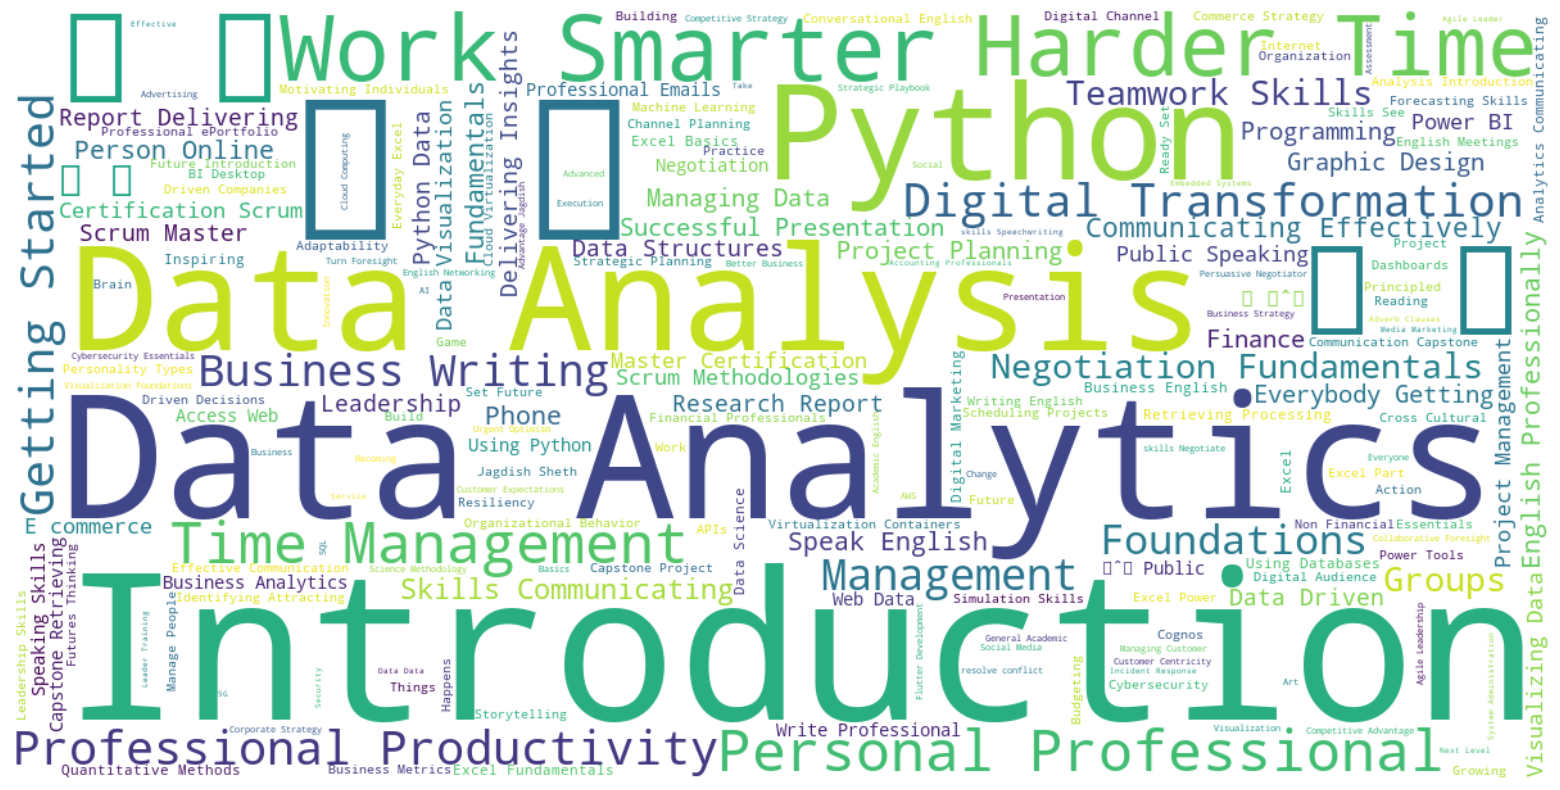

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
    min_font_size=2,
    width=1200,
    height=600,
    max_words=200
).generate(course_corpus)

# Display the generated image:
plt.clf()
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2- candidates_skills files

In [22]:
candidates_files = glob("Hackathon Datasets/Candidates & CVs/*/*_Candidates.csv")

In [23]:
len(candidates_files)

14

In [24]:
candidates_files

['Hackathon Datasets/Candidates & CVs\\Accounts Receivable Team Member\\Accounts_Receivable_Team_Member_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\Business Intelligence Team Leader\\Business_Intelligence_Team_Leader_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\DevOps & Billing Systems Professional\\DevOps_Billing_Systems_Professional_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\Enterprise Marcom Team Member\\Enterprise_Marcom_Team_Member_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\Front End Developer Team Member\\Front_End_Developer_Team_Member_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\Internal Audit Team Member\\Internal_Audit_Team_Member_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\IP & Enterprise Maintenance Engineer\\IP_Enterprise_Maintenance_Engineer_Candidates.csv',
 'Hackathon Datasets/Candidates & CVs\\NOC Administrator Team Member\\NOC_Administrator_Team_Member_Candidates.csv',
 'Hackathon Datasets/Candida

In [25]:
candidates_files[0].split("\\")[1]

'Accounts Receivable Team Member'

In [26]:
list_dataframes = []

In [27]:
for file_name in candidates_files:
    job_position = file_name.split("\\")[1]
    
    df = pd.read_csv(file_name)
    df["APPLIED_POSITION"] = job_position
    list_dataframes.append(df)

candidates = pd.concat(list_dataframes, axis=0, ignore_index=True)

In [28]:
candidates.shape

(2486, 14)

In [29]:
candidates.head(500)

CANDIDATE_REF_NUM                     DEGREE  \
0             445949.0          Bachelor's degree   
1             446359.0          Bachelor's degree   
2             448006.0            Master's degree   
3             448028.0          Bachelor's degree   
4             448425.0          Bachelor's degree   
5             450546.0          Bachelor's degree   
6             456183.0          Bachelor's degree   
7             456400.0          Bachelor's degree   
8             457746.0                        NaN   
9             460555.0                        bsc   
10            460988.0          Bachelor's degree   
11            461189.0          Bachelor's degree   
12            468115.0            Master's degree   
13            473566.0                       93.7   
14            475570.0          Bachelor's degree   
15            476120.0            Master's degree   
16            476214.0          Bachelor's degree   
17            479077.0                       Good   
18            479576.0          Bachelor's degree   
19            480108.0          Bachelor's degree   
20            481391.0          Bachelor's degree   
21            483680.0                       2.35   
22            484649.0          Bachelor's degree   
23            484961.0          Bachelor's degree   
24            485583.0          Bachelor's degree   
25            486045.0          Bachelor's degree   
26            487616.0          Bachelor's degree   
27            489436.0          Bachelor's degree   
28            493204.0          Bachelor's degree   
29            493872.0          Bachelor's degree   
30            493879.0          Bachelor's degree   
31            500128.0          Bachelor's degree   
32            500172.0          Bachelor's degree   
33            500266.0          Bachelor's degree   
34            505126.0          Bachelor's degree   
35            506783.0          Bachelor's degree   
36            510435.0          Bachelor's degree   
37            511104.0          Bachelor's degree   
38            511762.0          Bachelor's degree   
39            513593.0          Bachelor's degree   
40            516497.0          Bachelor's degree   
41            517721.0          Bachelor's degree   
42            517798.0          Bachelor's degree   
43            519289.0          Bachelor's degree   
44            519872.0          Bachelor's degree   
45            519885.0            Master's degree   
46            521948.0          Bachelor's degree   
47            523437.0          Bachelor's degree   
48            525037.0          Bachelor's degree   
49            528013.0          Bachelor's degree   
50            528223.0          Bachelor's degree   
51            528259.0          Bachelor's degree   
52            528985.0          Bachelor's degree   
53            530356.0          Bachelor's degree   
54            530602.0          Bachelor's degree   
55            530669.0          Bachelor's degree   
56            531047.0          Bachelor's degree   
57            537064.0          Bachelor's degree   
58            537966.0          Bachelor's degree   
59            542808.0          Bachelor's degree   
60            547838.0          Bachelor's degree   
61            554204.0          Bachelor's degree   
62            554413.0          Bachelor's degree   
63            560826.0          Bachelor's degree   
64            561417.0          Bachelor's degree   
65            561791.0          Bachelor's degree   
66            565137.0          Bachelor's degree   
67            565890.0          Bachelor's degree   
68            567192.0          Bachelor's degree   
69            567516.0                    Diploma   
70            567758.0          Bachelor's degree   
71            567775.0          Bachelor's degree   
72            567809.0            Master's degree   
73            567921.0          Bachelor's degree   
74            567932.0        

In [30]:
candidates.isnull().sum() / len(candidates)

CANDIDATE_REF_NUM         0.001207
DEGREE                    0.020515
FIELD_OF_STUDY            0.000000
EDUCATIONAL_INSTITUTE     0.009252
DATE_OF_BIRTH             0.020515
CITY                      0.021319
POSITION_HELD             0.006436
GRAD_YEAR                 0.002414
COUNTRY_OF_NATIONALITY    0.003218
HOME_PHONE                0.560338
OTHER_PHONE               0.001207
EMAIL                     0.001207
NOTES                     0.993966
APPLIED_POSITION          0.000000
dtype: float64

In [31]:
candidates.CANDIDATE_REF_NUM.nunique()

2139

In [32]:
candidates.DEGREE.value_counts(normalize=True)

Bachelor's degree                  0.802875
Master's degree                    0.068994
OTHER                              0.066119
Diploma                            0.025873
Certificate                        0.007392
Bachelor                           0.004107
Good                               0.002875
Higher Diploma                     0.002464
Associate's degree                 0.002464
Very good                          0.001643
Doctorate awarded                  0.001232
No final certificate               0.001232
(Excellent)                        0.000821
BCs                                0.000821
Post Graduate Certificate          0.000821
Higher Certificate                 0.000821
2.06                               0.000821
very good                          0.000411
76                                 0.000411
2.4                                0.000411
71.6                               0.000411
good                               0.000411
bachelor’s                      

In [33]:
candidates.FIELD_OF_STUDY.nunique()

847

In [34]:
candidates.FIELD_OF_STUDY.value_counts(normalize=True)[:100]

Accounting                          0.083669
Computer Science                    0.027755
Marketing                           0.024940
Electrical Engineering              0.020113
Business Administration             0.020113
Computer Engineering                0.016895
Computer science                    0.016492
Software Engineering                0.015286
Finance                             0.013274
Telecommunication Engineering       0.012068
Amman                               0.011665
Industrial Engineering              0.011665
Business administration             0.010861
Engineering                         0.010459
Computer Information Systems        0.010056
accounting                          0.009654
ACCOUNTING                          0.009252
computer science                    0.007643
Civil engineering                   0.006838
Accountant                          0.006838
Telecommunications Engineering      0.006034
Software engineering                0.006034
business a

In [35]:
candidates.EDUCATIONAL_INSTITUTE.nunique()

767

In [36]:
candidates.EDUCATIONAL_INSTITUTE.value_counts(normalize=True)[:100]

University of Jordan                                                      0.088104
Yarmouk University                                                        0.075112
Al-Balqa' Applied University                                              0.069428
The Hashemite University                                                  0.053593
Jordan University of Science and Technology                               0.030045
Princess Sumaya University for Technology                                 0.022330
Other - Hashemite University                                              0.019894
Al al-Bayt University                                                     0.015022
Mutah university                                                          0.015022
Zarqa University                                                          0.013804
Other - Balqa Applied University                                          0.012992
University of Petra                                                       0.012992
Al-A

In [37]:
candidates["DATE_OF_BIRTH"] = pd.to_datetime(candidates["DATE_OF_BIRTH"], errors="coerce")

candidates["AGE"] = (pd.to_datetime('now') - candidates["DATE_OF_BIRTH"]).dt.days / 365

C:\Users\tamer.tahamoqa\AppData\Local\Temp\ipykernel_14484\1433497530.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  candidates["DATE_OF_BIRTH"] = pd.to_datetime(candidates["DATE_OF_BIRTH"], errors="coerce")
C:\Users\tamer.tahamoqa\AppData\Local\Temp\ipykernel_14484\1433497530.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  candidates["AGE"] = (pd.to_datetime('now') - candidates["DATE_OF_BIRTH"]).dt.days / 365


In [38]:
candidates["AGE"].describe(percentiles=[.05, .25, .5, .75, .9, .95])

count    2435.000000
mean       30.087730
std         6.020200
min         1.208219
5%         24.241370
25%        26.038356
50%        28.630137
75%        32.486301
90%        38.657534
95%        41.980000
max        61.621918
Name: AGE, dtype: float64

In [39]:
candidates["GRAD_YEAR"].describe(percentiles=[.05, .25, .5, .75, .9, .95])

count    2480.000000
mean     1902.391532
std       467.206488
min         0.000000
5%          0.000000
25%      2014.000000
50%      2019.000000
75%      2021.000000
90%      2021.000000
95%      2022.000000
max      2025.000000
Name: GRAD_YEAR, dtype: float64

In [40]:
candidates.COUNTRY_OF_NATIONALITY.nunique()

35

In [41]:
candidates.COUNTRY_OF_NATIONALITY.value_counts(normalize=True)

Jordan                     0.920904
Sudan                      0.013317
Palestine                  0.012107
Pakistan                   0.009282
Egypt                      0.008878
India                      0.008475
Lebanon                    0.003632
Syria                      0.003632
Iraq                       0.003228
United Arab Emirates       0.001614
Saudi Arabia               0.001614
U S A                      0.001211
Bahamas                    0.001211
Azerbaijan                 0.000807
Yemen                      0.000807
Philippines                0.000807
Turkey                     0.000807
Sri Lanka                  0.000807
Somalia                    0.000404
Sweden                     0.000404
Zimbabwe                   0.000404
Bahrain                    0.000404
Indonesia                  0.000404
Russia                     0.000404
Virgin Islands, British    0.000404
Nigeria                    0.000404
Morocco                    0.000404
Australia                  0

In [42]:
candidates.CITY.nunique()

297

In [43]:
candidates.CITY.value_counts(normalize=True)[:100]

Amman                    0.608714
amman                    0.080148
Irbid                    0.030826
Zarqa                    0.028360
Jordan                   0.019729
AMMAN                    0.013152
Madaba                   0.006576
0                        0.005754
Salt                     0.004932
Riyadh                   0.004932
Khartoum                 0.004521
عمان                     0.004521
irbid                    0.003699
Cairo                    0.003699
jordan                   0.003288
Dubai                    0.003288
zarqa                    0.003288
Doha                     0.002877
Karachi                  0.002055
Haripur                  0.002055
Jerash                   0.002055
Aqaba                    0.002055
Islamabad                0.002055
Jarash                   0.002055
Amman, Jordan            0.002055
Ajloun                   0.002055
Beirut                   0.001644
Zarqa'                   0.001644
Alkarak                  0.001644
Amman jordan  

In [44]:
candidates.APPLIED_POSITION.value_counts(normalize=True)

Front End Developer Team Member               0.080451
Internal Audit Team Member                    0.080451
IP & Enterprise Maintenance Engineer          0.080451
Risk Management Team Leader                   0.080451
Social Media Team Member                      0.080451
Enterprise Marcom Team Member                 0.079646
Accounts Receivable Team Member               0.079244
Revenue Assurance TM                          0.077233
VAS Engineer                                  0.072003
Transmission Enterprise Solutions Engineer    0.065567
SOC Analyst Team Member                       0.059131
DevOps & Billing Systems Professional         0.057924
NOC Administrator Team Member                 0.055511
Business Intelligence Team Leader             0.051488
Name: APPLIED_POSITION, dtype: float64

In [45]:
candidates.NOTES.value_counts()

Hired    15
Name: NOTES, dtype: int64

In [46]:
candidates[
    candidates["NOTES"] == "Hired"
].sort_values(by="APPLIED_POSITION")

CANDIDATE_REF_NUM             DEGREE  \
169            412500.0  Bachelor's degree   
204            408008.0  Bachelor's degree   
411            708513.0  Bachelor's degree   
501            725841.0  Bachelor's degree   
863            554597.0        Certificate   
1231           816925.0  Bachelor's degree   
1046           736155.0  Bachelor's degree   
1289           806460.0  Bachelor's degree   
1558           409041.0  Bachelor's degree   
1652           560017.0  Bachelor's degree   
1907           800949.0  Bachelor's degree   
1923           801167.0  Bachelor's degree   
2089           805501.0  Bachelor's degree   
2155           828887.0  Bachelor's degree   
2313           758870.0  Bachelor's degree   

                                              FIELD_OF_STUDY  \
169                                               Accounting   
204                              Computer Information System   
411                                     Computer Engineering   
501                              Turkish & English Languages   
863                            Advanced Software Development   
1231                        Network Engineering and Security   
1046                                              Accounting   
1289                        Computer and network engineering   
1558                                  Electrical engineering   
1652                                   Public Administration   
1907                                        computer science   
1923                          network & security engineering   
2089                   Electronic marketing and social media   
2155                                  Electrical Engineering   
2313  Electrical, Electronics and Telecommunication Engineer   

                                                  EDUCATIONAL_INSTITUTE  \
169                                Other - AL-Balqaa Applied University   
204                                                University of Jordan   
411                                                  Yarmouk University   
501                                                University of Jordan   
863   Other - Abdul Aziz Al Ghurair School of Advanced Computing (ASAC)   
1231                        Jordan University of Science and Technology   
1046                                               University of Jordan   
1289                                       Al-Balqa' Applied University   
1558                                               University of Jordan   
1652                                               University of Jordan   
1907                                               University of Jordan   
1923                        Jordan University of Science and Technology   
2089                          Princess Sumaya University For Technology   
2155                                               University of Jordan   
2313                                   Other - The University of Jordan   

     DATE_OF_BIRTH          CITY  \
169     1996-09-11         Amman   
204     1984-12-02         Amman   
411     1997-08-24         Irbid   
501     1999-07-26  Jordan Amman   
863     1996-06-05         Amman   
1231    1999-11-16         Amman   
1046    1996-11-17         Amman   
1289    1998-06-11        jarash   
1558    1996-05-07         Amman   
1652    1988-12-05         Amman   
1907    2000-05-13         amman   
1923    1999-08-08         zarqa   
2089    1999-12-18         Amman   
2155    1999-09-11         Amman   
2313    1999-10-16      Az-Zarqa   

                                      POSITION_HELD  GRAD_YEAR  \
169                                      Accountant     2018.0   
204                 Corporate IT Leader (Data & BI)     2006.0   
411                                        Engineer     2021.0   
501                                              No     2021.0   
863          Software Developer/ Teaching Assistant     2020.0   
1231                               Network Engineer     2022.0   
1046

In [47]:
candidates["POSITION_HELD"].nunique()

1603

In [48]:
candidates["POSITION_HELD"].value_counts(normalize=True)[:100]

Accountant                                                   0.022672
Customer service                                             0.011336
Trainee                                                      0.010931
Sales                                                        0.007692
Customer service representative                              0.006883
Technical Support Engineer                                   0.006883
Data entry                                                   0.005668
Network Engineer                                             0.005263
Senior Accountant                                            0.004858
None                                                         0.004453
Project Manager                                              0.004453
Intern                                                       0.004049
Engineer                                                     0.004049
trainee                                                      0.003644
Customer Service    

In [49]:
candidates_held_position_corpus = " ".join(candidates['POSITION_HELD'].astype(str))

In [50]:
len(candidates_held_position_corpus)

51282

<Figure size 640x480 with 0 Axes>

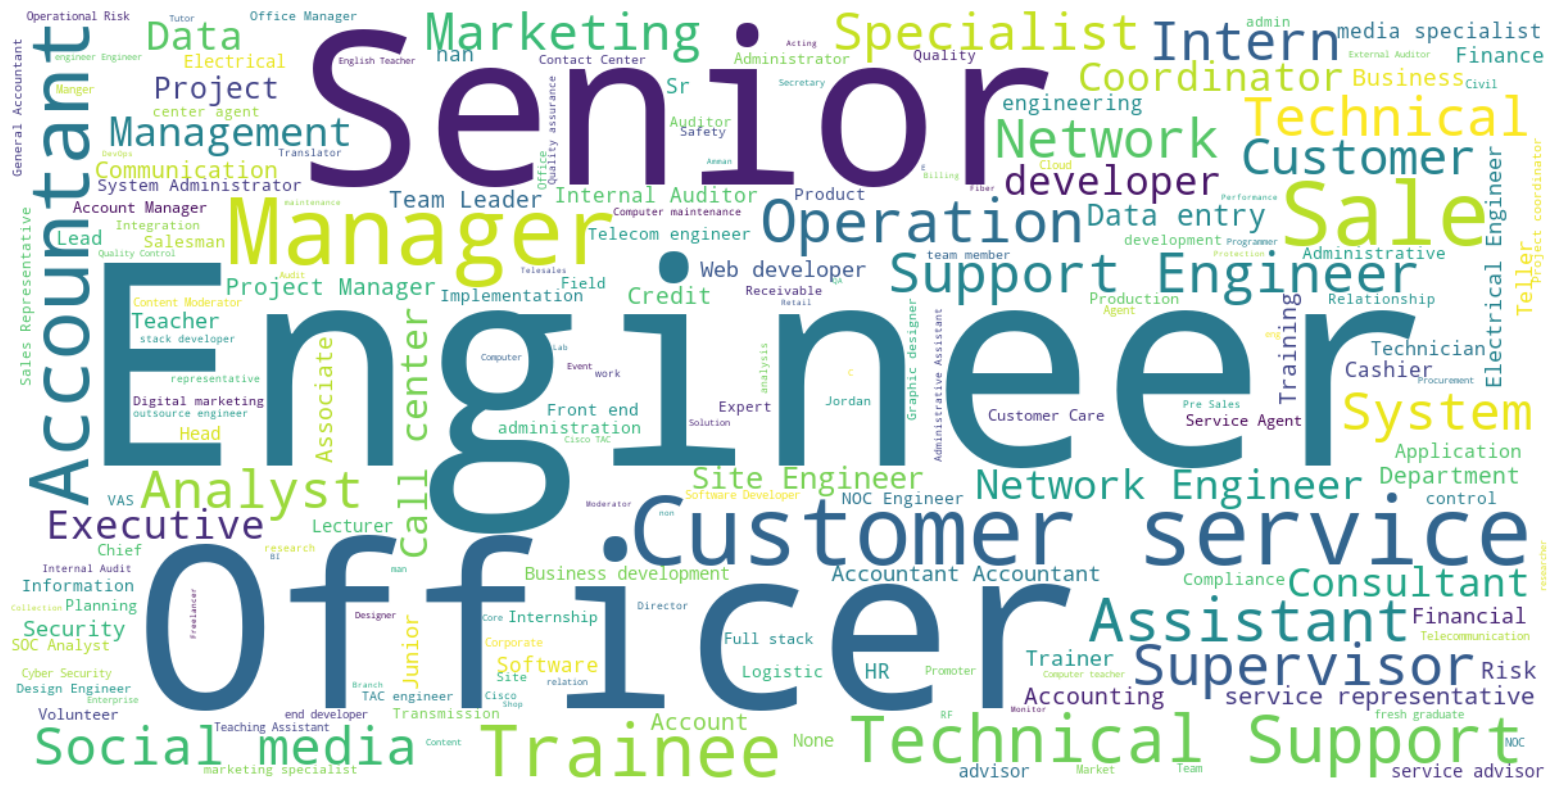

In [51]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
    min_font_size=2,
    width=1200,
    height=600,
    max_words=200
).generate(candidates_held_position_corpus)

# Display the generated image:
plt.clf()
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
candidates.to_excel("candidates-full.xlsx", index=False)

### 3- candidates_skills skillsets files

In [54]:
candidates_skills_files = glob("Hackathon Datasets/Candidates & CVs/*/*_Candidates_*.csv")

In [55]:
len(candidates_skills_files)

14

In [56]:
candidates_skills_files

['Hackathon Datasets/Candidates & CVs\\Accounts Receivable Team Member\\Accounts_Receivable_Team_Member_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\Business Intelligence Team Leader\\Business_Intelligence_Team_Leader_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\DevOps & Billing Systems Professional\\DevOps_Billing_Systems_Professional_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\Enterprise Marcom Team Member\\Enterprise_Marcom_Team_Member_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\Front End Developer Team Member\\Front_End_Developer_Team_Member_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\Internal Audit Team Member\\Internal_Audit_Team_Member_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\IP & Enterprise Maintenance Engineer\\IP_Enterprise_Maintenance_Engineer_Candidates_Skills.csv',
 'Hackathon Datasets/Candidates & CVs\\NOC Administrator Team Member\\NOC_Administrator_Team_Mem

In [57]:
candidates_skills_files[0].split("\\")[1]

'Accounts Receivable Team Member'

In [58]:
list_dataframes = []

In [59]:
for file_name in candidates_skills_files:
    job_position = file_name.split("\\")[1]
    
    df = pd.read_csv(file_name)
    df["APPLIED_POSITION"] = job_position
    list_dataframes.append(df)

candidates_skills = pd.concat(list_dataframes, axis=0, ignore_index=True)

In [60]:
candidates_skills.shape

(2071, 7)

In [61]:
candidates_skills.head(500)

Unnamed: 0  CANDIDATE_REF_NUM  \
0             0             602809   
1             1             448006   
2             2             523437   
3             3             424365   
4             4             444132   
5             5             407675   
6             6             487616   
7             7             410032   
8             8             403385   
9             9             404212   
10           10             744696   
11           11             425759   
12           12             519289   
13           13             438407   
14           14             424997   
15           15             405235   
16           16             481391   
17           17             407547   
18           18             439500   
19           19             438289   
20           20             568132   
21           21             519885   
22           22             409245   
23           23             441182   
24           24             500266   
25           25             407939   
26           26             448425   
27           27             567192   
28           28             568721   
29           29             569209   
30           30             560826   
31           31             437745   
32           32             568436   
33           33             554413   
34           34             456183   
35           35             443542   
36           36             537064   
37           37             722985   
38           38             426026   
39           39             441354   
40           40             568003   
41           41             442137   
42           42             412500   
43           43             604062   
44           44             431805   
45           45             457746   
46           46             582429   
47           47             423682   
48           48             406374   
49           49             528259   
50           50             414244   
51           51             602463   
52           52             461189   
53           53             404517   
54           54             484649   
55           55             603852   
56           56             421277   
57           57             460988   
58           58             476214   
59           59             575203   
60           60             425339   
61           61             405792   
62           62             468115   
63           63             444025   
64           64             602481   
65           65             528013   
66           66             422330   
67           67             438346   
68           68             569051   
69           69             423491   
70           70             444853   
71           71             485583   
72           72             484961   
73           73             530602   
74           74             445949   
75           75             530669   
76           76             407534   
77           77             531047   
78           78             410481   
79           79             500128   
80           80             412253   
81           81             407157   
82           82             423095   
83           83             569189   
84           84             505126   
85           85             568410   
86           86             603943   
87           87             422769   
88           88             567921   
89           89             409240   
90           90             473566   
91           91             408412   
92           92             493204   
93           93             415751   
94           94             721667   
95           95             409746   
96           96             404416   
97           97             479576   
98           98             407151   
99           99             603436   
100         100             422425   
101         101             567516   
102         102             567932   
103         103             407663   
104         104

In [62]:
candidates_skills = candidates_skills.drop(columns=["Unnamed: 0"], axis=1)

In [63]:
candidates_skills.isnull().sum() / len(candidates_skills)

CANDIDATE_REF_NUM    0.0
UNIVERSITY           0.0
EDUCATION            0.0
LANGUAGES            0.0
SKILLS               0.0
APPLIED_POSITION     0.0
dtype: float64

In [64]:
candidates_skills.CANDIDATE_REF_NUM.nunique()

1828

In [67]:
candidates_skills.UNIVERSITY.nunique()

1133

In [66]:
candidates_skills.UNIVERSITY.value_counts(normalize=True)[:100]

University of Jordan                                                                                                             0.039112
Yarmouk University                                                                                                               0.037180
Unknown                                                                                                                          0.032352
Al-Balqa Applied University                                                                                                      0.022211
Hashemite University                                                                                                             0.020280
The Hashemite University                                                                                                         0.018349
Jordan University of Science and Technology                                                                                      0.015451
Philadelphia University           

In [68]:
candidates_skills.EDUCATION.nunique()

929

In [69]:
candidates_skills.EDUCATION.value_counts(normalize=True)[:100]

Accounting                                                     0.069532
Unknown                                                        0.035732
Computer Science                                               0.031869
Marketing                                                      0.026074
Electrical Engineering                                         0.026074
Business Administration                                        0.023660
Computer Engineering                                           0.020763
Software Engineering                                           0.020280
Communication Engineering                                      0.016900
Telecommunication Engineering                                  0.014486
Industrial Engineering                                         0.012071
Civil Engineering                                              0.011106
Computer Information Systems                                   0.009174
accounting                                                     0

In [70]:
candidates_skills.LANGUAGES.nunique()

926

In [71]:
candidates_skills.LANGUAGES.value_counts(normalize=True)[:100]

Arabic,English                                                                                                                                                   0.202801
Unknown                                                                                                                                                          0.162240
English,Arabic                                                                                                                                                   0.056012
ARABIC,ENGLISH                                                                                                                                                   0.013520
English                                                                                                                                                          0.013520
Arabic,English,Turkish                                                                                                                                

In [72]:
candidates_skills.APPLIED_POSITION.value_counts(normalize=True)

Risk Management Team Leader                   0.084500
Front End Developer Team Member               0.083535
IP & Enterprise Maintenance Engineer          0.083052
Accounts Receivable Team Member               0.081603
Internal Audit Team Member                    0.081120
Social Media Team Member                      0.080637
Revenue Assurance TM                          0.077740
Enterprise Marcom Team Member                 0.070980
VAS Engineer                                  0.069049
Transmission Enterprise Solutions Engineer    0.068566
SOC Analyst Team Member                       0.057943
NOC Administrator Team Member                 0.054080
Business Intelligence Team Leader             0.053597
DevOps & Billing Systems Professional         0.053597
Name: APPLIED_POSITION, dtype: float64

In [73]:
candidates_skills.SKILLS.nunique()

1875

In [74]:
candidates_skills.SKILLS.value_counts(normalize=True)[:100]

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [79]:
candidates_skills_corpus = " ".join(candidates_skills['SKILLS'].astype(str))

In [80]:
len(candidates_skills_corpus)

739531

<Figure size 640x480 with 0 Axes>

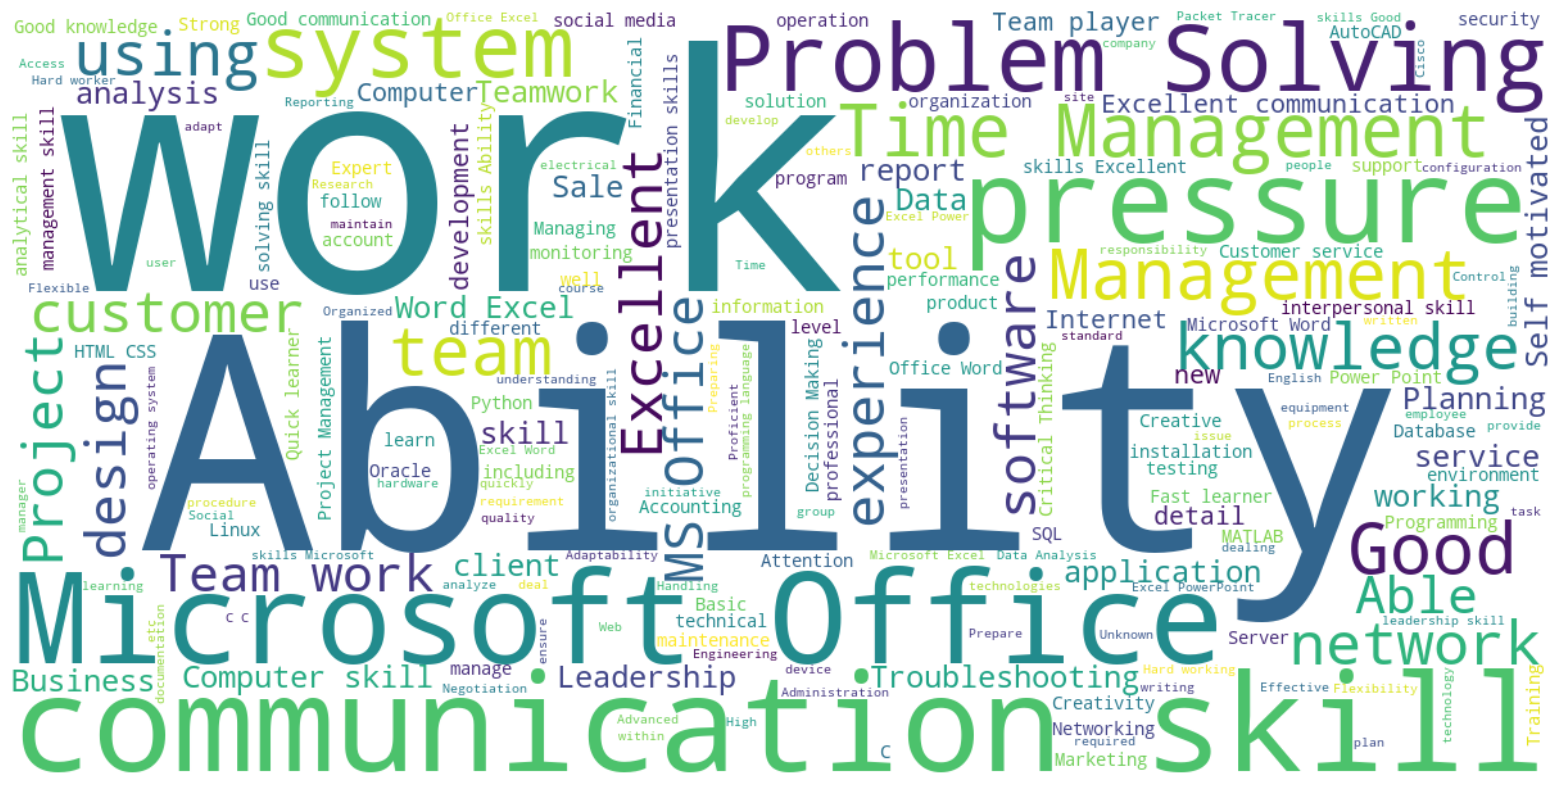

In [81]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
    min_font_size=2,
    width=1200,
    height=600,
    max_words=200
).generate(candidates_skills_corpus)

# Display the generated image:
plt.clf()
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
candidates_skills.head()

CANDIDATE_REF_NUM  \
0             602809   
1             448006   
2             523437   
3             424365   
4             444132   

                                                                          UNIVERSITY  \
0                           University of Bedfordshire,American University of Madaba   
1                                    AL Zaytoonah University,AL Zaytoonah University   
2                                                                University of Mutah   
3                                                                 Yarmouk University   
4  Applied Science University Private (ASU),Al-Khader School Private In Jordan-Amman   

                                           EDUCATION  \
0  global business administration,Arts of Accounting   
1                              Accounting,Accounting   
2                        Finance and Banking Science   
3                       Finance and Banking Sciences   
4                                         Accounting   

                                                                               LANGUAGES  \
0                                                                         Arabic,English   
1  Arabic: Native (tongue language),-English : Excellent (speaking, reading and writing)   
2                                                                         Arabic,English   
3      Arabic: Native or Bilingual proficiency,English: Professional working proficiency   
4                                                    Arabic (Native),English (very good)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        SKILLS  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             MS-Office,Oracle   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Team work,Individual work,Work under pressure,Office work,Self-Motivated,Hardworking.,MS Word, MS Excel, MS Works.,Internet.,Accountant   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Ability to interpret,Attention to detail,Ability to apply rules to real-life facts,Deals with internal and external customers   

In [105]:
candidates_skills.to_excel("candidates-skills-full.xlsx", index=False)

### 4- Joining candidates with candidates skillsets files

In [83]:
candidates.head()

CANDIDATE_REF_NUM             DEGREE                 FIELD_OF_STUDY  \
0           445949.0  Bachelor's degree            Finance and Banking   
1           446359.0  Bachelor's degree  Accounting Information System   
2           448006.0    Master's degree                     Accounting   
3           448028.0  Bachelor's degree                    Engineering   
4           448425.0  Bachelor's degree       International Accounting   

                        EDUCATIONAL_INSTITUTE DATE_OF_BIRTH       CITY  \
0                       Al al-Bayt University    1997-09-20       aman   
1        Other - Al-Balqaa Applied University    1986-01-17      Amman   
2              Other - Alzaytoonah university    1996-06-06      Amman   
3  MISR University FOR SCIENCE AND TECHNOLOGY    1992-02-09  Abu nsair   
4                 German Jordanian University    1995-07-20      Amman   

                            POSITION_HELD  GRAD_YEAR COUNTRY_OF_NATIONALITY  \
0  Working on cash and assistant official     2019.0                 Jordan   
1                         Finance Officer     2009.0                 Jordan   
2                       Senior Accountant     2021.0                 Jordan   
3                        Site engineering     2015.0                 Jordan   
4                              Accountant     2019.0                 Jordan   

      HOME_PHONE      OTHER_PHONE            EMAIL NOTES  \
0            NaN       7975705511  ayham@gmail.com   NaN   
1            NaN  +962 7992295800  raeda@yahoo.com   NaN   
2      657368136    9630000009829  azeez@gmail.com   NaN   
3  9630000006794       7966664313  azmoo@yahoo.com   NaN   
4            NaN       7995968234  Alman@gmail.com   NaN   

                  APPLIED_POSITION        AGE  
0  Accounts Receivable Team Member  26.463014  
1  Accounts Receivable Team Member  38.145205  
2  Accounts Receivable Team Member  27.753425  
3  Accounts Receivable Team Member  32.079452  
4  Accounts Receivable Team Member  28.635616

In [85]:
candidates_skills.head()

CANDIDATE_REF_NUM  \
0             602809   
1             448006   
2             523437   
3             424365   
4             444132   

                                                                          UNIVERSITY  \
0                           University of Bedfordshire,American University of Madaba   
1                                    AL Zaytoonah University,AL Zaytoonah University   
2                                                                University of Mutah   
3                                                                 Yarmouk University   
4  Applied Science University Private (ASU),Al-Khader School Private In Jordan-Amman   

                                           EDUCATION  \
0  global business administration,Arts of Accounting   
1                              Accounting,Accounting   
2                        Finance and Banking Science   
3                       Finance and Banking Sciences   
4                                         Accounting   

                                                                               LANGUAGES  \
0                                                                         Arabic,English   
1  Arabic: Native (tongue language),-English : Excellent (speaking, reading and writing)   
2                                                                         Arabic,English   
3      Arabic: Native or Bilingual proficiency,English: Professional working proficiency   
4                                                    Arabic (Native),English (very good)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        SKILLS  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             MS-Office,Oracle   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Team work,Individual work,Work under pressure,Office work,Self-Motivated,Hardworking.,MS Word, MS Excel, MS Works.,Internet.,Accountant   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Ability to interpret,Attention to detail,Ability to apply rules to real-life facts,Deals with internal and external customers   

In [86]:
common_cols = list(set(candidates.columns).intersection(set(candidates_skills.columns)))

In [87]:
common_cols

['APPLIED_POSITION', 'CANDIDATE_REF_NUM']

In [89]:
candidates["APPLIED_POSITION"] = candidates["APPLIED_POSITION"].astype(str)
candidates["CANDIDATE_REF_NUM"] = pd.to_numeric(candidates["CANDIDATE_REF_NUM"], errors="coerce", downcast='integer')

candidates_skills["APPLIED_POSITION"] = candidates_skills["APPLIED_POSITION"].astype(str)
candidates_skills["CANDIDATE_REF_NUM"] = pd.to_numeric(candidates_skills["CANDIDATE_REF_NUM"], errors="coerce", downcast='integer')

In [91]:
candidates.shape

(2486, 15)

In [92]:
candidates_skills.shape

(2071, 6)

In [90]:
joined = candidates.dropna(subset=["APPLIED_POSITION", "CANDIDATE_REF_NUM"]).merge(
    candidates_skills.dropna(subset=["APPLIED_POSITION", "CANDIDATE_REF_NUM"]),
    how="inner",
    on=common_cols
)

In [93]:
joined.shape

(1931, 19)

In [94]:
joined.head()

CANDIDATE_REF_NUM             DEGREE                 FIELD_OF_STUDY  \
0           445949.0  Bachelor's degree            Finance and Banking   
1           446359.0  Bachelor's degree  Accounting Information System   
2           448006.0    Master's degree                     Accounting   
3           448425.0  Bachelor's degree       International Accounting   
4           450546.0  Bachelor's degree                     Accounting   

                  EDUCATIONAL_INSTITUTE DATE_OF_BIRTH   CITY  \
0                 Al al-Bayt University    1997-09-20   aman   
1  Other - Al-Balqaa Applied University    1986-01-17  Amman   
2        Other - Alzaytoonah university    1996-06-06  Amman   
3           German Jordanian University    1995-07-20  Amman   
4              Other - Petra university    1994-12-17  Amman   

                            POSITION_HELD  GRAD_YEAR COUNTRY_OF_NATIONALITY  \
0  Working on cash and assistant official     2019.0                 Jordan   
1                         Finance Officer     2009.0                 Jordan   
2                       Senior Accountant     2021.0                 Jordan   
3                              Accountant     2019.0                 Jordan   
4                      Rejonal accountant     2019.0                 Jordan   

  HOME_PHONE      OTHER_PHONE            EMAIL NOTES  \
0        NaN       7975705511  ayham@gmail.com   NaN   
1        NaN  +962 7992295800  raeda@yahoo.com   NaN   
2  657368136    9630000009829  azeez@gmail.com   NaN   
3        NaN       7995968234  Alman@gmail.com   NaN   
4        NaN       7955296010  najio@gmail.com   NaN   

                  APPLIED_POSITION        AGE  \
0  Accounts Receivable Team Member  26.463014   
1  Accounts Receivable Team Member  38.145205   
2  Accounts Receivable Team Member  27.753425   
3  Accounts Receivable Team Member  28.635616   
4  Accounts Receivable Team Member  29.224658   

                                        UNIVERSITY  \
0                     Al al-Bayt University/Jordan   
1                     Al-Balqaa Applied University   
2  AL Zaytoonah University,AL Zaytoonah University   
3                      German Jordanian University   
4                              University Of Petra   

                                                          EDUCATION  \
0                                      B.Sc. in Finance and Banking   
1                                     Accounting Information System   
2                                             Accounting,Accounting   
3  International Accounting,Management Sciences and Finance Student   
4                                                       Accountancy   

                                                                               LANGUAGES  \
0                                                    Arabic: Mother tongue,English: good   
1                                      English: V.Good in writing, reading and speaking.   
2  Arabic: Native (tongue language),-English : Excellent (speaking, reading and writing)   
3                                                                  Arabic,English,German   
4                                                                         Arabic,English   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    SKILLS  
0                                      Skills in mathematics and technology ?The ability to calculate and deal with numbers ? Communication skills with different groups of 

In [95]:
joined.CANDIDATE_REF_NUM.nunique()

1703

In [97]:
joined.APPLIED_POSITION.nunique()

14

In [96]:
joined.APPLIED_POSITION.value_counts(normalize=True)

Risk Management Team Leader                   0.090627
IP & Enterprise Maintenance Engineer          0.089073
Internal Audit Team Member                    0.087002
Social Media Team Member                      0.086484
Accounts Receivable Team Member               0.084930
Revenue Assurance TM                          0.078716
Enterprise Marcom Team Member                 0.076126
VAS Engineer                                  0.074055
Transmission Enterprise Solutions Engineer    0.069394
SOC Analyst Team Member                       0.062144
NOC Administrator Team Member                 0.058001
Business Intelligence Team Leader             0.057483
DevOps & Billing Systems Professional         0.057483
Front End Developer Team Member               0.028483
Name: APPLIED_POSITION, dtype: float64

In [106]:
joined.to_excel("candidates-joined-with-candidates-skills.xlsx", index=False)

In [98]:
employee_courses_analysis = employee_courses.copy(deep=True)

In [99]:
employee_courses_analysis.head()

EMPLOYEE_ID                 CURRENT_DEPARTMENT  \
0  Employee_1      Commercial Support Department   
1  Employee_2                                NaN   
2  Employee_3                                NaN   
3  Employee_4                  Consumer Business   
4  Employee_5  Technology and Digital Innovation   

                    CURRENT_JOB_TITLE            PREVIOUS_DEPARTMENT  \
0  Support & Quality Unit Team Member  Commercial Support Department   
1                                 NaN            Enterprise Business   
2                                 NaN                    Engineering   
3  VIP Account's (Darak) Professional              Consumer Business   
4          Enterprise Applications PT                            NaN   

                           PREVIOUS_JOB_TITLE  \
0  Delivery & Back Office Support Team Member   
1                    Network Administrator TM   
2                                NOC Operator   
3            VIP Account's Manager (Darak) TM   
4            CRM Analyst and Developer Intern   

                                                 COURSE  \
0  Teamwork Skills: Communicating Effectively in Groups   
1                                      Business Writing   
2                             Negotiation  Fundamentals   
3  Teamwork Skills: Communicating Effectively in Groups   
4        Databases and SQL for Data Science with Python   

                       DATE  
0  2023-05-12T12:05:41.000Z  
1  2021-11-09T23:46:50.000Z  
2  2021-11-03T22:14:46.000Z  
3  2023-08-16T08:33:00.000Z  
4  2023-03-30T09:26:06.000Z

In [100]:
employee_courses_analysis["JOB_TITLE"] = employee_courses_analysis["CURRENT_JOB_TITLE"]

In [101]:
employee_courses_analysis["JOB_TITLE"] = employee_courses_analysis["JOB_TITLE"].fillna(employee_courses_analysis["PREVIOUS_JOB_TITLE"])

In [103]:
employee_courses_analysis[
    employee_courses_analysis["JOB_TITLE"].isin(candidates["APPLIED_POSITION"])
]["JOB_TITLE"].value_counts(normalize=True)

Front End Developer Team Member    0.400000
Internal Audit Team Member         0.266667
Accounts Receivable Team Member    0.200000
Risk Management Team Leader        0.066667
NOC Administrator Team Member      0.066667
Name: JOB_TITLE, dtype: float64